In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [72]:
# Shuffle the DataFrame
df_shuff = df[0:5_000]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph_labels'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [76]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
# Create the model
model = AdaBoostClassifier(n_estimators= 500, learning_rate= 1.0, algorithm= 'SAMME')

# Use the KFold function to split the data into 5 folds
kf = KFold(n_splits=5)

# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_train = cross_val_score(model, X_train, y_train, cv=kf)
# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_test = cross_val_score(model, X_test, y_test, cv=kf)
# Calculate the mean accuracy score across all the folds
mean_accuracy_train = accuracies_train.mean()
mean_accuracy_test = accuracies_test.mean()
print(f"Mean accuracy_train: {mean_accuracy_train:.3f}")
print(f"Mean accuracy_test: {mean_accuracy_test:.3f}")


Mean accuracy_train: 0.599
Mean accuracy_test: 0.598


In [60]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])

In [61]:
acc_train = np.array([62.9,59.9,60.8,61.7,61.1,59.9,59.6,60.0,61.6,60.3,60.8])
acc_test = np.array([62.0,59.8,60.5,59.8,60.6,62.0,61.8,61.7,61.2,62.7,61.0])

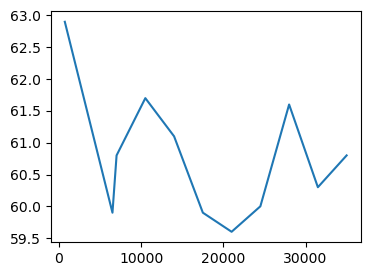

In [66]:
plt.figure(figsize=(4,3))
plt.plot(datasize_tr,acc_train)